# 1.2 K-NN

#### 코드 참조

https://github.com/songsuoyuan/The-Element-of-Statistical-Learning-Python-Implements

In [ ]:
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt

In [ ]:
data_path_url = 'https://raw.githubusercontent.com/SLCFLAB/Fintech2025-2/main/Basic_day1/data/'
data = np.loadtxt(data_path_url + 'mixture_simulation_data.txt', skiprows=1)
means = np.loadtxt(data_path_url + 'means.txt')
X = data[:,:2]
y = data[:,2]

In [ ]:
def k_nearest_neighbor(X, y, k):
    '''
    K nearest neighbor method:
        y(x) = 1 / k * (y_1 + ... + y_k)
    where y_i belongs to the k closest points to the point x
    Complexity: based on implement, brute force is O(Dn^2)
    '''
    
    # 1) 모델 학습
    clf = neighbors.KNeighborsRegressor(n_neighbors=k)
    clf.fit(X, y)

    # 2) 결정 경계(decision boundary)를 그리기 위한 예측 격자 생성
    δ = 0.1
    xs = np.arange(X[:,0].min()-0.5, X[:,0].max()+0.5, δ)
    ys = np.arange(X[:,1].min()-0.5, X[:,1].max()+0.5, δ)
    GX, GY = np.meshgrid(xs, ys)
    pts = np.c_[GX.ravel(), GY.ravel()]

    # 3) 격자 예측 및 형태 복원
    Z = clf.predict(pts).reshape(GX.shape)

    # 4) 시각화
    plt.figure(figsize=(8,8))
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.6)      # 데이터 산점도
    plt.contour(GX, GY, Z, levels=[Z.mean()],        # 결정 경계
                alpha=0.8, colors='b', linewidths=3)
    plt.show()

    # 5) 정확도 계산
    preds = np.round(clf.predict(X))
    acc = (preds == y).mean() * 100
    print(f'Precision: {acc:.2f}%')

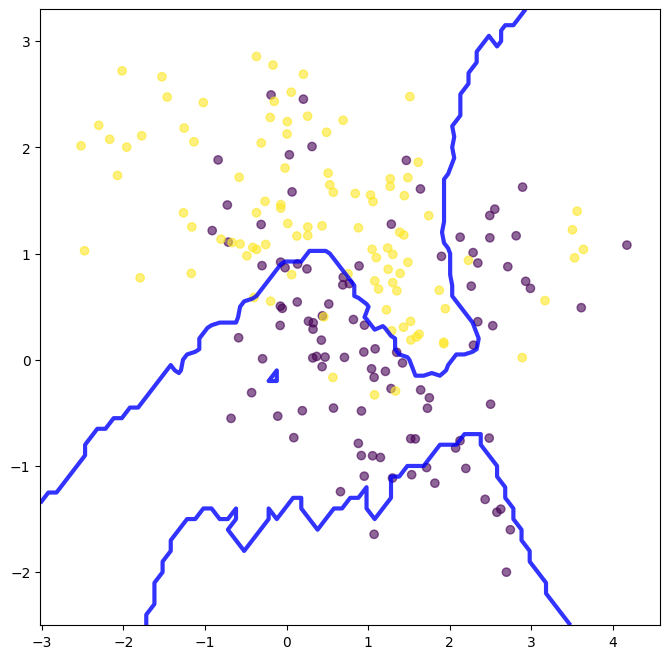

Precision: 84.5


In [ ]:
k_nearest_neighbor(X, y, 15)